# Exploratory Data Analysis

## Set Up

In [1]:
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import seaborn as sns
import pandas as pd # type: ignore
import numpy as np
import sys
import os

# Update paths to get source code from notebook_utils
curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import *
from notebook_utils.exploratory import *

# Create combined dataframe from ghcn_clean files
dfs = combine_files_to_dfs("../data/ghcn_clean")
CA_stations_clean = pd.concat(dfs, ignore_index=True) # type: ignore

# add a datetime column for summary statistics
CA_stations_clean['datetime'] = pd.to_datetime(CA_stations_clean[['Year', 'Month', 'Day', 'Hour']])

Processed file: CA_2003_clean.csv
Processed file: CA_2004_clean.csv
Processed file: CA_2005_clean.csv
Processed file: CA_2006_clean.csv
Processed file: CA_2007_clean.csv
Processed file: CA_2008_clean.csv
Processed file: CA_2009_clean.csv
Processed file: CA_2010_clean.csv
Processed file: CA_2011_clean.csv
Processed file: CA_2012_clean.csv
Processed file: CA_2013_clean.csv
Processed file: CA_2014_clean.csv
Processed file: CA_2015_clean.csv
Processed file: CA_2016_clean.csv
Processed file: CA_2017_clean.csv
Processed file: CA_2018_clean.csv
Processed file: CA_2019_clean.csv
Processed file: CA_2020_clean.csv
Processed file: CA_2021_clean.csv
Processed file: CA_2022_clean.csv
Processed file: CA_2023_clean.csv


In [2]:
CA_stations_clean.head()

,Station_ID,Station_name,Latitude,Longitude,Year,Month,Day,Hour,Temperature,datetime
0,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,0,5.2,2003-01-01 00:00:00
1,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,1,5.0,2003-01-01 01:00:00
2,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,2,4.8,2003-01-01 02:00:00
3,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,3,4.6,2003-01-01 03:00:00
4,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,4,4.3,2003-01-01 04:00:00


# Summary Statistics

### Hourly Scale

In [3]:
by_hour = CA_stations_clean.groupby(['datetime'])['Temperature']
hourly_scale = by_hour.agg(['mean', 'median', 'std', 'min', 'max','count']).reset_index()
hourly_scale.columns = ['datetime', 'mean_temperature', 'median_temperature', 'std_temperature', 
                        'min_temperature', 'max_temperature','temperature_count']

hourly_scale.head()

,datetime,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003-01-01 00:00:00,5.455844,5.2,2.380540,-3.0,11.1,77
1,2003-01-01 01:00:00,5.229870,5.0,2.275965,-2.0,10.0,77
2,2003-01-01 02:00:00,5.037662,4.8,2.320903,-2.0,11.0,77
3,2003-01-01 03:00:00,4.861039,4.6,2.618314,-3.0,16.0,77
4,2003-01-01 04:00:00,4.558442,4.3,2.455625,-2.0,13.0,77


### Daily Scale

In [4]:
by_day = CA_stations_clean.groupby(['datetime'])['Temperature']
daily_scale = by_day.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
daily_scale.columns = ['date', 'mean_temperature', 'median_temperature', 'std_temperature', 
                       'min_temperature', 'max_temperature', 'temperature_count']

# calculate daily range
daily_scale['temperature_range'] = daily_scale['max_temperature'] - daily_scale['min_temperature']

daily_scale.head()

,date,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count,temperature_range
0,2003-01-01 00:00:00,5.455844,5.2,2.380540,-3.0,11.1,77,14.1
1,2003-01-01 01:00:00,5.229870,5.0,2.275965,-2.0,10.0,77,12.0
2,2003-01-01 02:00:00,5.037662,4.8,2.320903,-2.0,11.0,77,13.0
3,2003-01-01 03:00:00,4.861039,4.6,2.618314,-3.0,16.0,77,19.0
4,2003-01-01 04:00:00,4.558442,4.3,2.455625,-2.0,13.0,77,15.0


### Monthly Scale

In [5]:
CA_stations_clean['year_month'] = CA_stations_clean['datetime'].dt.to_period('M')
by_month = CA_stations_clean.groupby(['year_month'])['Temperature']
monthly_scale = by_month.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
monthly_scale.columns = ['year_month', 'mean_temperature', 'median_temperature', 'std_temperature', 
                         'min_temperature', 'max_temperature', 'temperature_count']

monthly_scale.head()

,year_month,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003-01,11.248291,11.0,4.620033,-8.0,34.0,57986
1,2003-02,9.843785,10.5,4.836168,-8.0,28.0,52191
2,2003-03,12.318625,12.1,5.129457,-8.0,34.0,58019
3,2003-04,11.759857,11.9,4.704196,-8.0,33.0,56072
4,2003-05,16.082911,15.0,6.090625,-6.1,39.0,57978


### Seasonal Scale

In [6]:

CA_stations_clean['Season'] = CA_stations_clean['datetime'].dt.month.apply(assign_season)

by_season = CA_stations_clean.groupby(['Year', 'Season'])['Temperature']

seasonal_scale = by_season.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
seasonal_scale.columns = ['Year', 'Season', 'mean_temperature', 'median_temperature', 'std_temperature', 
                          'min_temperature', 'max_temperature', 'temperature_count']

seasonal_scale.head()

,Year,Season,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003,Fall,16.064549,15.6,7.056251,-8.1,39.0,170172
1,2003,Spring,13.404902,13.0,5.681396,-8.0,39.0,172069
2,2003,Summer,20.997451,20.0,6.286648,-2.0,39.0,171189
3,2003,Winter,10.150619,10.4,4.739653,-8.0,34.0,168013
4,2004,Fall,15.246296,14.5,6.878646,-8.0,39.0,170224


### Yearly Scale

In [7]:
by_year = CA_stations_clean.groupby(['Year'])['Temperature']
yearly_scale = by_year.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
yearly_scale.columns = ['Year', 'mean_temperature', 'median_temperature', 'std_temperature', 
                        'min_temperature', 'max_temperature', 'temperature_count']

yearly_scale.head()

,Year,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003,15.174084,14.2,7.195885,-8.1,39.0,681443
1,2004,15.082075,14.4,7.191329,-8.1,39.0,683705
2,2005,15.133501,14.4,7.072631,-8.1,39.0,679913
3,2006,15.125548,14.4,7.794533,-8.1,39.0,678283
4,2007,15.127169,14.5,7.742213,-8.1,39.0,678736


# Data Visualizations

In [8]:
cols = ['Station_ID', 'Station_name', 'Latitude', 'Longitude', 'datetime','Year', 'Month', 'Day', 'Hour', 'Temperature','Season']
CA_stations_clean = CA_stations_clean[cols]
CA_stations_clean.head()

,Station_ID,Station_name,Latitude,Longitude,datetime,Year,Month,Day,Hour,Temperature,Season
0,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 00:00:00,2003,1,1,0,5.2,Winter
1,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 01:00:00,2003,1,1,1,5.0,Winter
2,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 02:00:00,2003,1,1,2,4.8,Winter
3,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 03:00:00,2003,1,1,3,4.6,Winter
4,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 04:00:00,2003,1,1,4,4.3,Winter


### Histograms

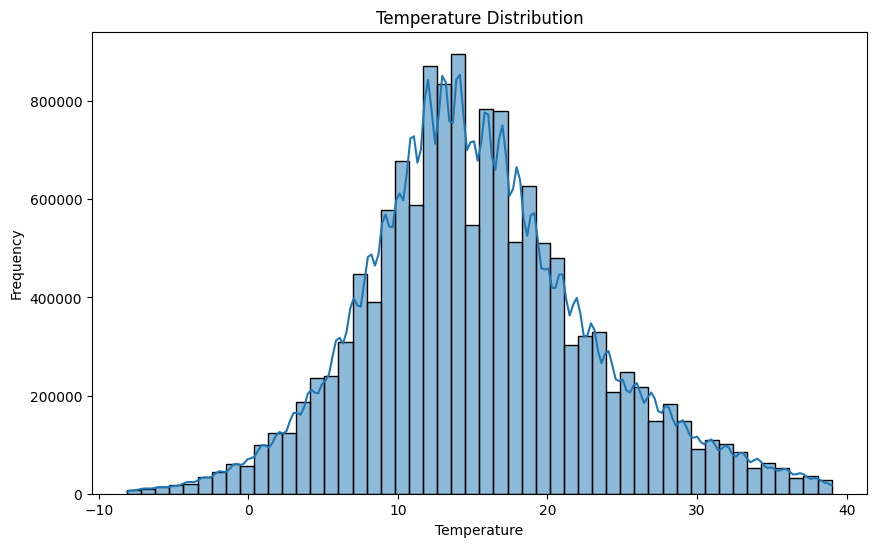

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(CA_stations_clean['Temperature'], bins=50, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### Boxplots

Hourly Temperature

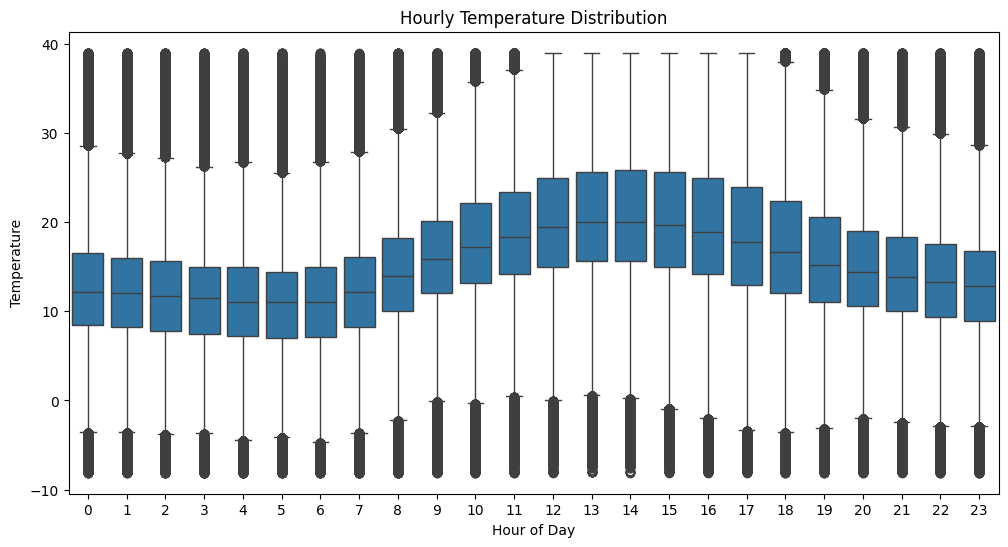

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Hour',y='Temperature', data=CA_stations_clean)
plt.title('Hourly Temperature Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.show()

Monthly Temperature

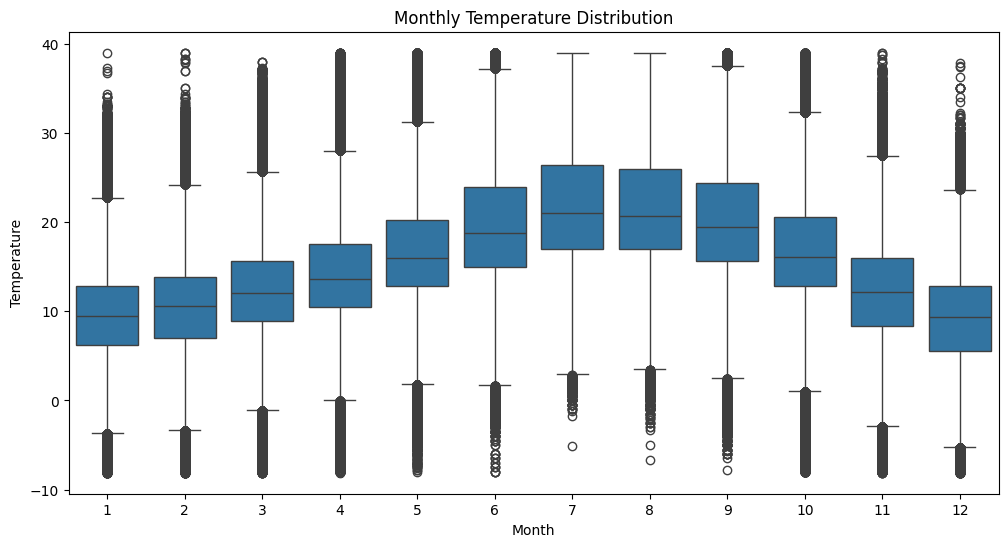

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature', data=CA_stations_clean)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

Seasonal Temperature

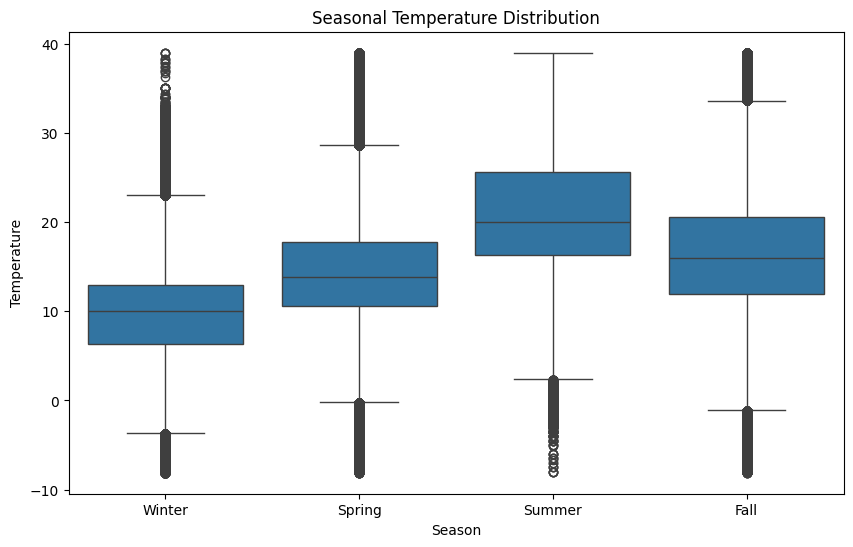

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Temperature', data=CA_stations_clean)
plt.title('Seasonal Temperature Distribution')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.show()

### Time series plots

Daily Average Temperature

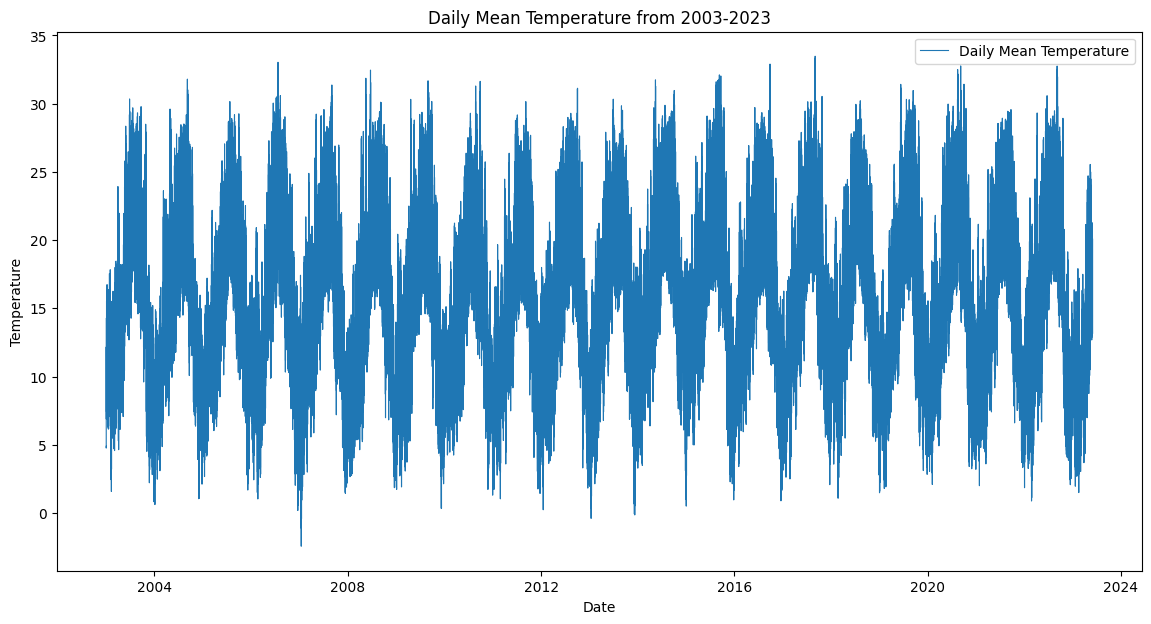

In [13]:
import matplotlib.dates as mdates

daily_scale['rolling_mean_temp'] = daily_scale['mean_temperature'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(daily_scale['date'], daily_scale['rolling_mean_temp'], label='Daily Mean Temperature',linewidth=0.8)
plt.title('Daily Mean Temperature from 2003-2023')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

Monthly Average Temperature

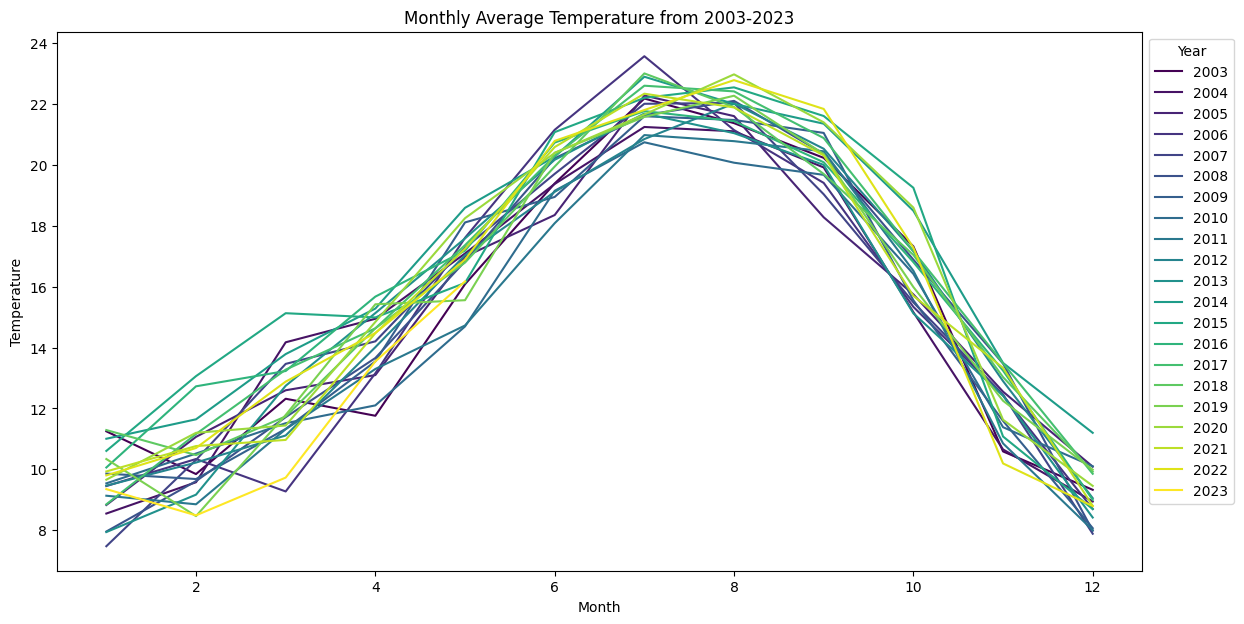

In [14]:
# Create new columns
monthly_scale = CA_stations_clean.groupby(['Year', 'Month'])['Temperature'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='mean', hue='Year', data=monthly_scale, palette='viridis',legend='full')
plt.title('Monthly Average Temperature from 2003-2023')
plt.xlabel('Month')
plt.ylabel('Temperature')

# move legend
plt.legend(title='Year',bbox_to_anchor=(1,1),loc='upper left')
plt.show()

Yearly Average Temperature

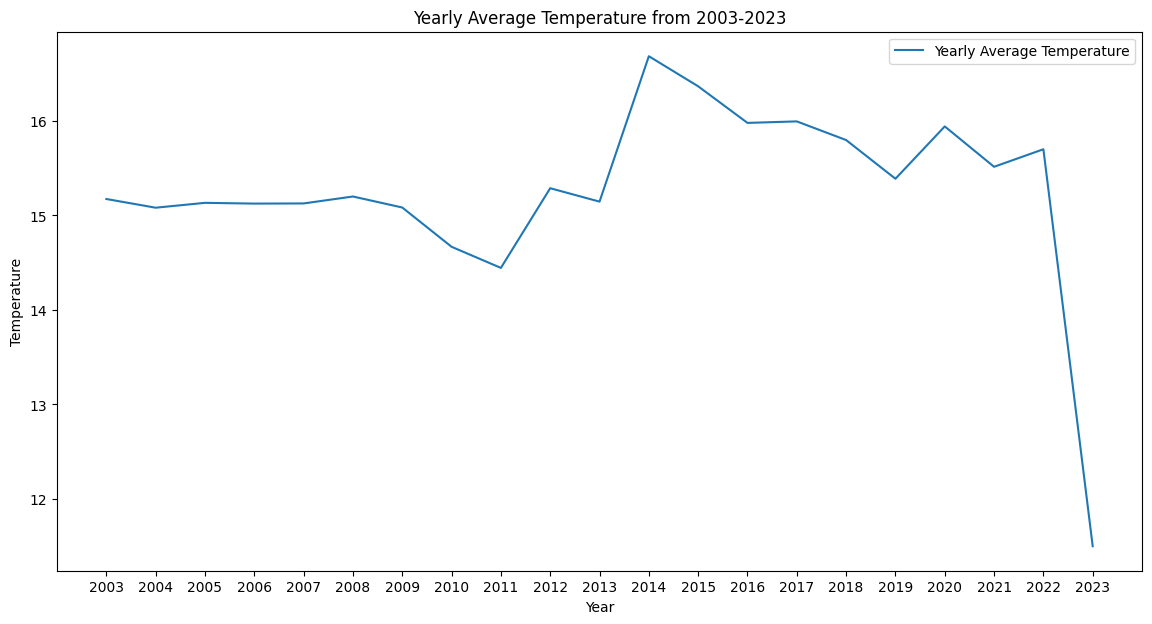

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(yearly_scale['Year'], yearly_scale['mean_temperature'], label='Yearly Average Temperature')
plt.title('Yearly Average Temperature from 2003-2023')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(yearly_scale['Year'].astype(int))
plt.legend()
plt.show()

# Diurnal Variations Analysis

### Set up

In [16]:
# use geolocator to get city and county names for each station
geolocator = Nominatim(user_agent='diurnal_analysis')

station_info_df = station_geo(CA_stations_clean, geolocator)

# add county and city names to main dataframe
CA_stations_clean = add_county_city(CA_stations_clean,station_info_df)

County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name saved.
County and city name

Uncomment code below to display how many stations are within each county and city

In [17]:
unique_county = CA_stations_clean.groupby('County')['Station_ID'].nunique().reset_index()
unique_county.columns = ['County', 'Unique_Stations']
#unique_county

In [18]:
unique_city = CA_stations_clean.groupby('City')['Station_ID'].nunique().reset_index()
unique_city.columns = ['City', 'Unique_Stations']
#unique_city

Generate plots for all stations and save in plots/station_plots

In [20]:
plots_dir = '../plots/station_plots'
os.makedirs(plots_dir,exist_ok=True)

# plot for each station
save_diurnal_plots(CA_stations_clean, plots_dir, 'Station_ID', 'Station')

Plotted and saved dirunal cycle patterns for Station: USW00023224
Plotted and saved dirunal cycle patterns for Station: USW00023225
Plotted and saved dirunal cycle patterns for Station: USW00023230
Plotted and saved dirunal cycle patterns for Station: USW00023232
Plotted and saved dirunal cycle patterns for Station: USW00023233
Plotted and saved dirunal cycle patterns for Station: USW00023234
Plotted and saved dirunal cycle patterns for Station: USW00023237
Plotted and saved dirunal cycle patterns for Station: USW00023243
Plotted and saved dirunal cycle patterns for Station: USW00023244
Plotted and saved dirunal cycle patterns for Station: USW00023254
Plotted and saved dirunal cycle patterns for Station: USW00023257
Plotted and saved dirunal cycle patterns for Station: USW00023258
Plotted and saved dirunal cycle patterns for Station: USW00023259
Plotted and saved dirunal cycle patterns for Station: USW00023271
Plotted and saved dirunal cycle patterns for Station: USW00023272
Plotted an

Generate plots for all California cities

In [21]:
cities_dir = '../plots/city_plots'
os.makedirs(cities_dir,exist_ok=True)

# plot for each city
save_diurnal_plots(CA_stations_clean, cities_dir, 'City', 'City')


Plotted and saved dirunal cycle patterns for City: Auburn
Plotted and saved dirunal cycle patterns for City: 
Plotted and saved dirunal cycle patterns for City: Alameda
Plotted and saved dirunal cycle patterns for City: Sacramento
Plotted and saved dirunal cycle patterns for City: Salinas
Plotted and saved dirunal cycle patterns for City: South San Francisco
Plotted and saved dirunal cycle patterns for City: Manteca
Plotted and saved dirunal cycle patterns for City: Lompoc
Plotted and saved dirunal cycle patterns for City: Concord
Plotted and saved dirunal cycle patterns for City: Merced
Plotted and saved dirunal cycle patterns for City: San Francisco
Plotted and saved dirunal cycle patterns for City: Santa Maria
Plotted and saved dirunal cycle patterns for City: Watsonville
Plotted and saved dirunal cycle patterns for City: Livermore
Plotted and saved dirunal cycle patterns for City: Palo Alto
Plotted and saved dirunal cycle patterns for City: San Jose
Plotted and saved dirunal cycle 

Generate plots for all California counties

In [22]:
counties_dir = '../plots/county_plots'
os.makedirs(counties_dir,exist_ok=True)

# plot for each county
save_diurnal_plots(CA_stations_clean, counties_dir, 'County', 'County')

Plotted and saved dirunal cycle patterns for County: Placer County
Plotted and saved dirunal cycle patterns for County: Alameda County
Plotted and saved dirunal cycle patterns for County: Sacramento County
Plotted and saved dirunal cycle patterns for County: Monterey County
Plotted and saved dirunal cycle patterns for County: San Mateo County
Plotted and saved dirunal cycle patterns for County: San Joaquin County
Plotted and saved dirunal cycle patterns for County: Santa Barbara County
Plotted and saved dirunal cycle patterns for County: Santa Clara County
Plotted and saved dirunal cycle patterns for County: Contra Costa County
Plotted and saved dirunal cycle patterns for County: Merced County
Plotted and saved dirunal cycle patterns for County: Stanislaus County
Plotted and saved dirunal cycle patterns for County: 
Plotted and saved dirunal cycle patterns for County: Mendocino County
Plotted and saved dirunal cycle patterns for County: Santa Cruz County
Plotted and saved dirunal cycle

## Representative stations

Calculate statistics for each station and get representative stations for:
- the station with the highest observed average temperature
- the station with the lowest observed average temperature
- the station with the highest observed temperature
- the station with the lowest observed temperature
- the station with the largest range of temperatures

In [ ]:
# dictionary with representative stations: 
representative_stations = get_representative_stations(CA_stations_clean)

### Station with Highest Observed Average Temperature

In [ ]:
# show plot

### Station with Lowest Observed Average Temperature

In [ ]:
# show plot

### Station with Highest Observed Temperature

In [ ]:
# show plot

### Station with Lowest Observed Temperature

In [ ]:
# show plot

### Station with Largest Range of Temperatures

In [ ]:
# show plot